In [163]:
!pip install six
!pip install pydotplus
!pip install graphviz 


In [164]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from six import StringIO  
from IPython.display import Image  
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\karthek.chakravarthy\Anaconda3\Library\bin\graphviz'
import pydotplus
import seaborn as sns

    #Steps:
            1) Load the data
            2) Understand the data - head , isnull count , 5 point summary, dimension of data
            3) Preprocess the data
                a) Null columns 
                b) Missing value imputation
                c) Scaling data a) Standardization b) Normalization
                d) Column encoding (One hot encoding , Ordinal encoding)
            4 Split Data to Test/Train datasets
                a Apply classifier/Regressor
                b)valuation Matrix - Classification - Precision , Accuracy , Confustion Matrix , F1 Score , Error
                                     - Regression - RSquared , MAPE , MAE ,Adj Rsqauare , AIC 
                c)Fine tuning model

In [165]:
data_bank = pd.read_csv('bank.csv')

In [166]:
data_bank.shape

(11162, 17)

In [167]:
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [168]:
data_bank.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [169]:
data_bank.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [170]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


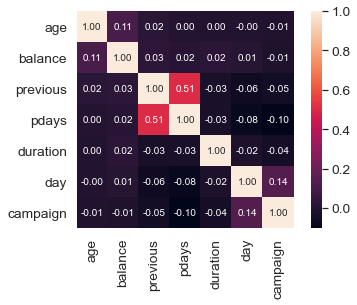

In [171]:
corrmat = data_bank.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'age')['age'].index
cm = np.corrcoef(data_bank[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

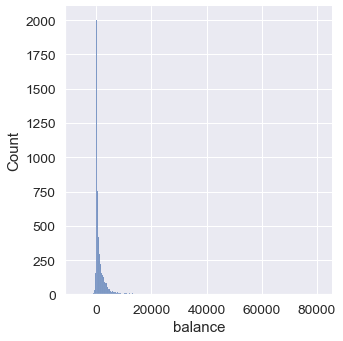

In [172]:
#Outliers
sns.displot(data_bank['balance'])

In [173]:
fig = px.histogram(data_bank, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [174]:
fig = px.histogram(data_bank, 
                   x='balance', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Balance')
fig.update_layout(bargap=0.1)
fig.show()

<AxesSubplot:>

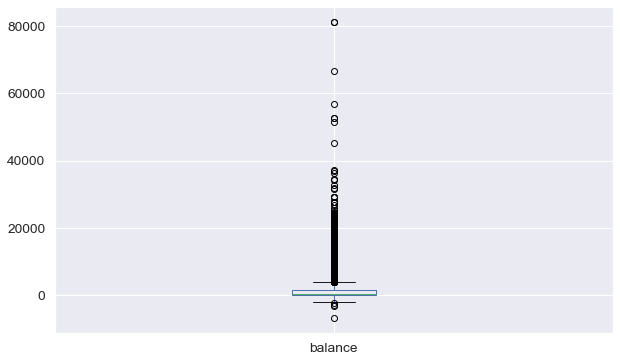

In [175]:
plt.figure(figsize=(10,6))
data_bank.balance.plot(kind="box")

In [176]:
data_bank.balance.describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [68]:
data_bank.drop(data_bank[data_bank['balance']>1708].index,axis=0,inplace=True)

In [69]:
data_bank.drop(data_bank[data_bank['balance']<122].index,axis=0,inplace=True)

In [70]:
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
11,30,blue-collar,married,secondary,no,309,yes,no,unknown,7,may,1574,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11150,34,management,married,secondary,no,355,no,no,cellular,21,aug,314,3,-1,0,unknown,no
11151,40,management,married,tertiary,no,917,yes,no,unknown,20,may,292,1,-1,0,unknown,no
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no


In [71]:
fig = px.histogram(data_bank, 
                   x='balance', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Balance')
fig.update_layout(bargap=0.1)
fig.show()

<AxesSubplot:>

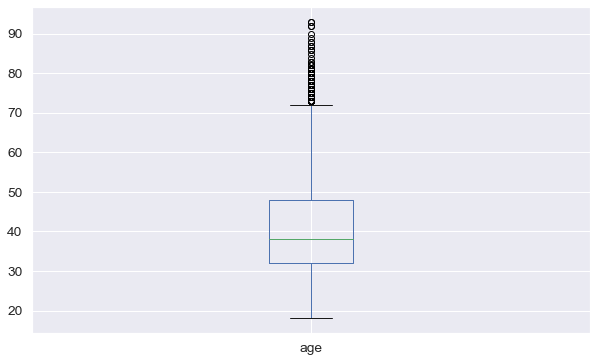

In [72]:
plt.figure(figsize=(10,6))
data_bank.age.plot(kind='box')

In [73]:
data_bank['age'].describe()

count    5589.000000
mean       40.385758
std        11.693628
min        18.000000
25%        32.000000
50%        38.000000
75%        48.000000
max        93.000000
Name: age, dtype: float64

In [74]:
data_bank.drop(data_bank[data_bank['age']>48].index,axis=0,inplace=True)

In [75]:
data_bank.drop(data_bank[data_bank['age']<32].index,axis=0,inplace=True)

<AxesSubplot:>

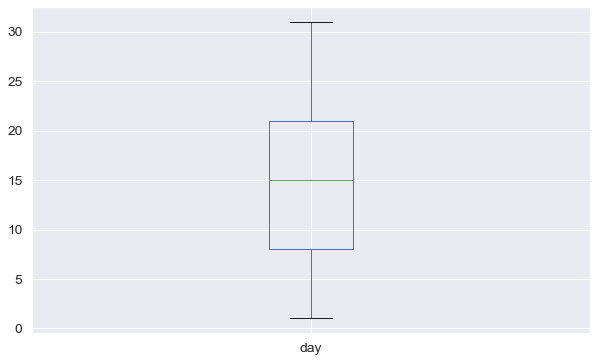

In [76]:
plt.figure(figsize=(10,6))
data_bank.day.plot(kind='box')

In [42]:
data_bank['day'].describe()

count    2896.000000
mean       15.275552
std         8.346845
min         1.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        31.000000
Name: day, dtype: float64

In [77]:
data_bank.drop(data_bank[data_bank['day']>21].index,axis=0,inplace=True)

In [78]:
data_bank.drop(data_bank[data_bank['day']<8].index,axis=0,inplace=True)

<AxesSubplot:>

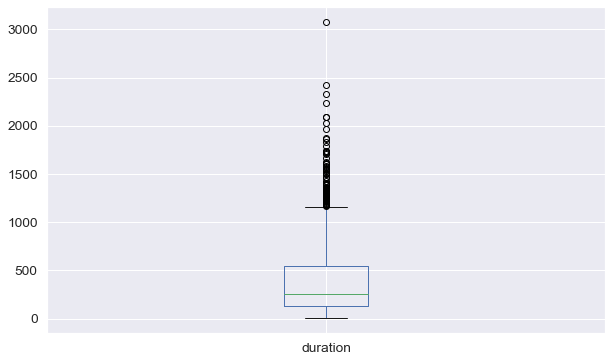

In [79]:
plt.figure(figsize=(10,6))
data_bank.duration.plot(kind='box')

In [81]:
data_bank['duration'].describe()

count    1552.000000
mean      389.233247
std       378.188830
min         2.000000
25%       126.750000
50%       254.500000
75%       541.500000
max      3076.000000
Name: duration, dtype: float64

In [82]:
data_bank.drop(data_bank[data_bank['duration']>541].index,axis=0,inplace=True)

In [83]:
data_bank.drop(data_bank[data_bank['duration']<126].index,axis=0,inplace=True)

<AxesSubplot:>

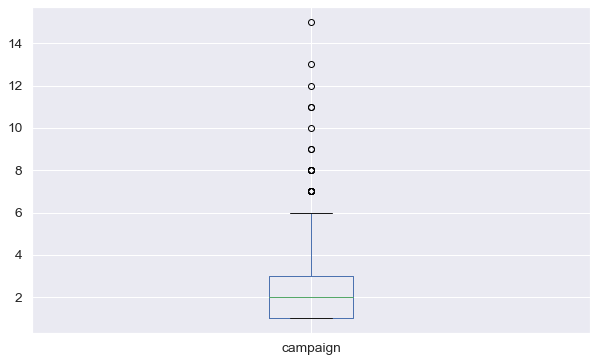

In [84]:
plt.figure(figsize=(10,6))
data_bank.campaign.plot(kind='box')

In [85]:
data_bank.campaign.describe()

count    780.000000
mean       2.167949
std        1.660922
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       15.000000
Name: campaign, dtype: float64

In [86]:
data_bank.drop(data_bank[data_bank['campaign']<1].index,axis=0,inplace=True)

In [87]:
data_bank.drop(data_bank[data_bank['campaign']<3].index,axis=0,inplace=True)

<AxesSubplot:>

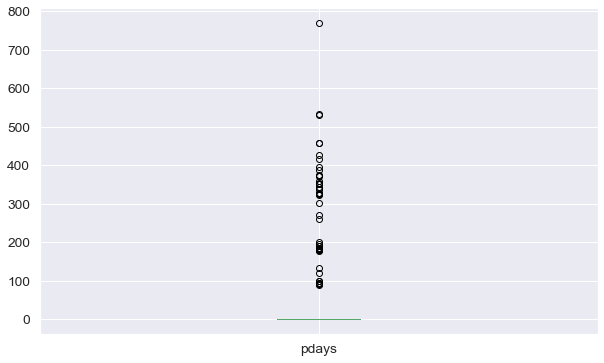

In [88]:
plt.figure(figsize=(10,6))
data_bank.pdays.plot(kind='box')

In [90]:
data_bank.pdays.describe()

count    214.000000
mean      65.714953
std      136.447614
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       -1.000000
max      769.000000
Name: pdays, dtype: float64

In [93]:
data_bank.drop(data_bank[data_bank['pdays']>-1].index,axis=0,inplace=True)

<AxesSubplot:>

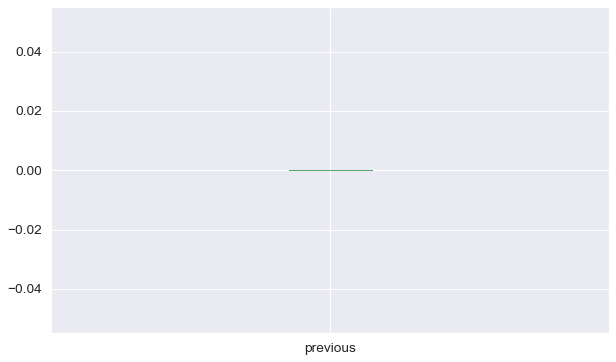

In [95]:
plt.figure(figsize=(10,6))
data_bank.previous.plot(kind='box')

In [96]:
data_bank.previous.describe()

count    162.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: previous, dtype: float64

In [177]:
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [178]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [179]:
encoded_df = preprocessor(data_bank)
encoded_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1


In [180]:
x = encoded_df.drop('deposit',axis=1).values
y = encoded_df['deposit'].values

In [181]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Build Decision Tree Model

# Decision Tree with Cart(Gini)
# Decision Tree with depth 2

In [182]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train)

model_dt_2_score_train = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Training Score',model_dt_2_score_train)

print('Testing Score',model_dt_2_score_test)

Training Score 0.7129577780266547
Testing Score 0.7044334975369458


# Build Decision Tree Model
# Decision Tree with Cart(Gini)
# Decision Tree with depth 3

In [183]:
model_dt_3 = DecisionTreeClassifier(random_state=1,max_depth=3)

model_dt_3.fit(x_train,y_train)

model_dt_3_score_train = model_dt_3.score(x_train,y_train)

model_dt_3_score_test = model_dt_3.score(x_test,y_test)

print('Training Score',model_dt_3_score_train)

print('Testing Score',model_dt_3_score_test)

Training Score 0.7753387837383806
Testing Score 0.7711598746081505


# Build Decision Tree Model
# Decision Tree with Cart(Gini)
# Decision Tree with depth 4

In [184]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(x_train,y_train)

model_dt_4_score_train = model_dt_4.score(x_train,y_train)

model_dt_4_score_test = model_dt_4.score(x_test,y_test)

print('Training Score',model_dt_4_score_train)

print('Testing Score',model_dt_4_score_test)

Training Score 0.7975137193414716
Testing Score 0.7984773846842812


### Build Decision Tree Model
### Decision Tree with Cart(Gini)
### Decision Tree with depth 8

In [189]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(x_train,y_train)

model_dt_8_score_train = model_dt_8.score(x_train,y_train)

model_dt_8_score_test = model_dt_8.score(x_test,y_test)

print('Training Score',model_dt_8_score_train)

print('Testing Score',model_dt_8_score_test)

Training Score 0.8587747788106171
Testing Score 0.8217644424540976


### Decision Tree with c4.5(entropy)

In [188]:
model_dt = DecisionTreeClassifier(max_depth=8,criterion='entropy')

model_dt.fit(x_train,y_train)

y_pred_dt = model_dt.predict_proba(x_test)[:,1]
# y_pred_dt

model_dt_score_train = model_dt.score(x_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(x_test,y_test)
print(model_dt_score_test)

0.842871542165976
0.8119122257053292


## Graphical Represetation of Tree

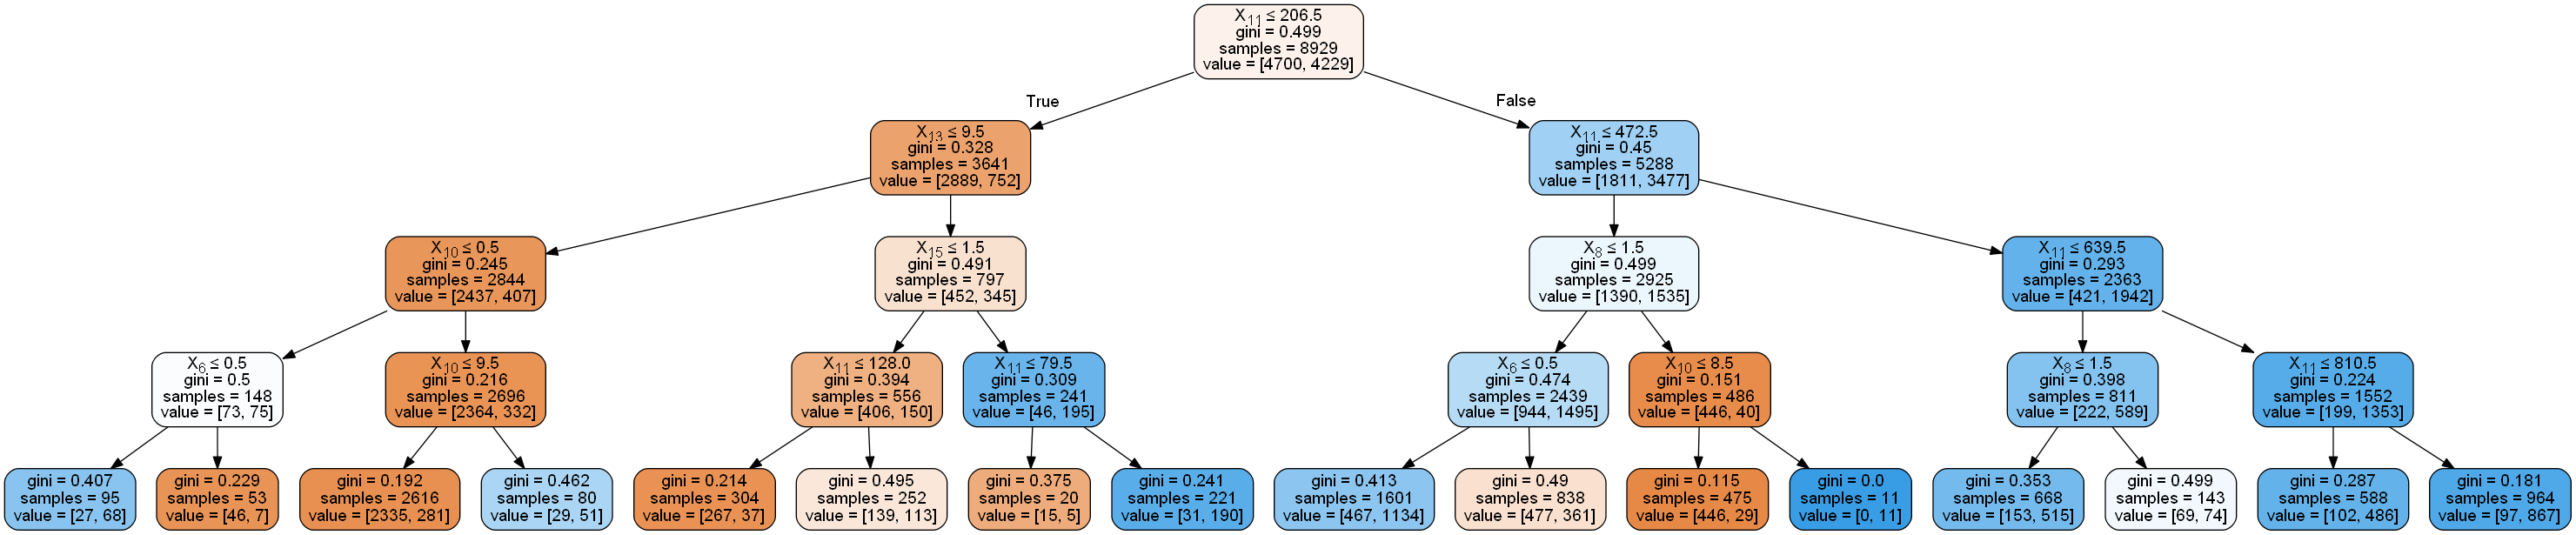

In [206]:

dot_data = StringIO()
export_graphviz(model_dt_4,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [201]:
encoded_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


#### Performance Metrics

In [211]:
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

In [213]:
predictions = model_dt_8.predict(x_test)
# print(predictions)

print(model_dt_8.score(x_test,y_test))
y_actual_result = y_test[0]
# print(y_actual_result)

0.8217644424540976


In [214]:
for i in range(len(predictions)):
    if (predictions[i]==1):
        y_actual_result = np.vstack((y_actual_result,y_test[i]))
#         print(y_actual_result)

## Insert New Column with Prediction

In [220]:
predictions.size

2233

In [226]:
df_preditor_without_target = encoded_df.drop('deposit',axis=1).values
df_preditor_only_target = encoded_df['deposit'].values

In [227]:
print(df_preditor_only_target)

[1 1 1 ... 0 0 0]


In [228]:
predictions1 = model_dt_8.predict(df_preditor_without_target)

In [229]:
print(predictions1)

[1 0 1 ... 0 0 1]


In [231]:
data_bank['test_data'] = np.where(df_preditor_only_target,predictions1,df_preditor_only_target)

In [232]:
encoded_df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1


In [233]:
data_bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,test_data
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1


In [236]:
data_bank['test_data'].replace(to_replace=1,value='True',inplace=True)

In [237]:
data_bank['test_data'].replace(to_replace=0,value='False',inplace=True)

In [238]:
data_bank.to_csv('Bank_with_Prediction_3_Point_Summary.csv')

# Recall

In [239]:
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
    if (result == 1):
        count +=1
print("true yes|predict true yes:")
print(count/float(len(y_actual_result)))

true yes|predict true yes:
0.7917034421888791


## Area Under the Curve

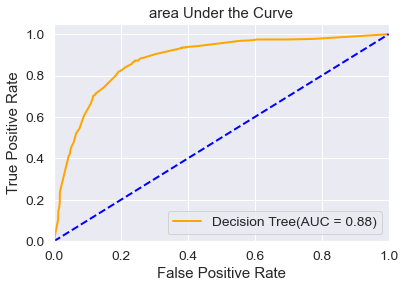

In [242]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

## Confusion Matrix

In [243]:
print(confusion_matrix(y_test,predictions))

[[938 235]
 [163 897]]


In [244]:
accuracy_score(y_test,predictions)

0.8217644424540976

In [245]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model,normalize=False):
    cm = confusion_matrix(y_test,model,labels=[0,1])
    classes = ["Success","Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matix"
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        cm = np.around(cm,decimals=3)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

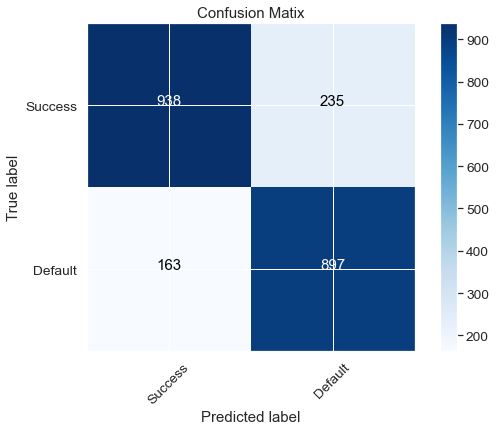

In [246]:
plt.figure(figsize=(8,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

## prunning of the Tree

In [247]:
from sklearn.tree._tree import TREE_LEAF
def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min()<threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are children visit them as well
    if inner_tree.children_left[index] !=TREE_LEAF:
        prune_index(inner_tree,inner_tree.children_left[index],threshold)
        prune_index(inner_tree,inner_tree.children_right[index],threshold)
        
print(sum(model_dt.tree_.children_left<0))
# start pruning from the root
prune_index(model_dt.tree_,0,5)
sum(model_dt.tree_.children_left<0)

# it means that the code has created(352-297)=55 new leaf nodes
# (by practically removing links to their ancesters). The tree, which has looked before like

145


171

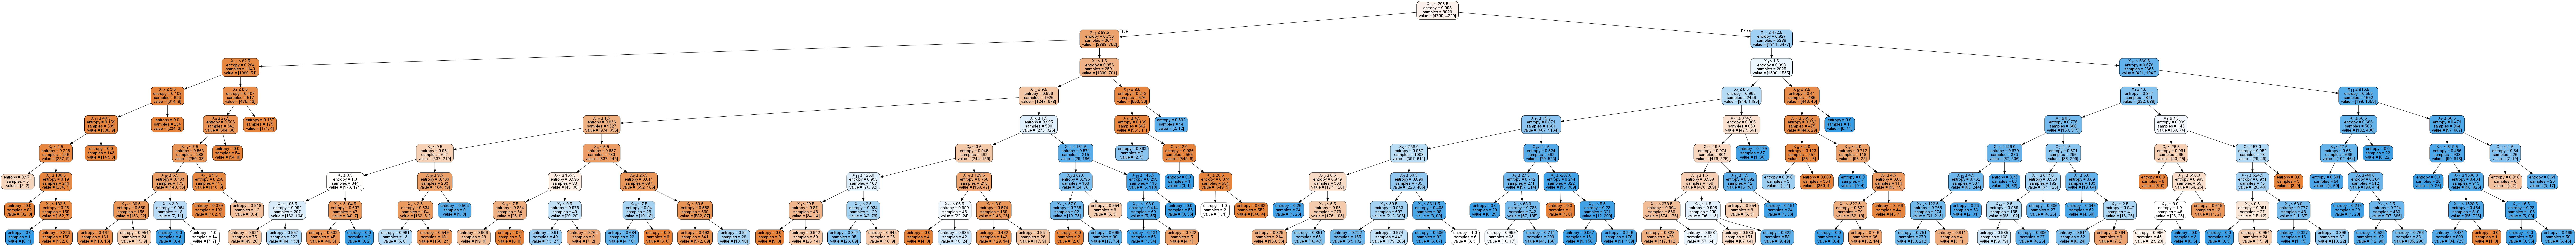

<Figure size 720x576 with 0 Axes>

In [248]:
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_jpg())